<a href="https://colab.research.google.com/github/pranauww/making-your-first-ml-model/blob/main/CelsiusToFahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
temp_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Celsius+to+Fahrenheit.csv')

In [ ]:
temp_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [ ]:
temp_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [ ]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

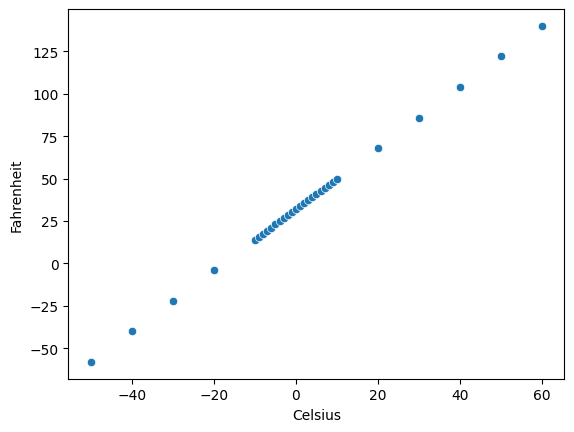

In [ ]:
sns.scatterplot(data=temp_df, x="Celsius", y="Fahrenheit")

In [ ]:
X_train = temp_df['Celsius']
Y_train = temp_df['Fahrenheit']

In [ ]:
X_train.shape

(30,)

In [ ]:
Y_train.shape

(30,)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(1), loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, Y_train, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 366ms/step - loss: 7.2273
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 504.4022
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 31.5673
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 110.8794
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 292.7018
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 220.3609
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 63.3658
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 0.9416
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 62.0952
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 138.2369
Epoch 11/500
1/1 [==============================] - 0s 9ms/step - loss: 135.5003
Epoch 12/500
1/1 [==============================] - 0s 12ms/step - loss: 69.3523
Epoch 13/500
1/1 [=====================

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

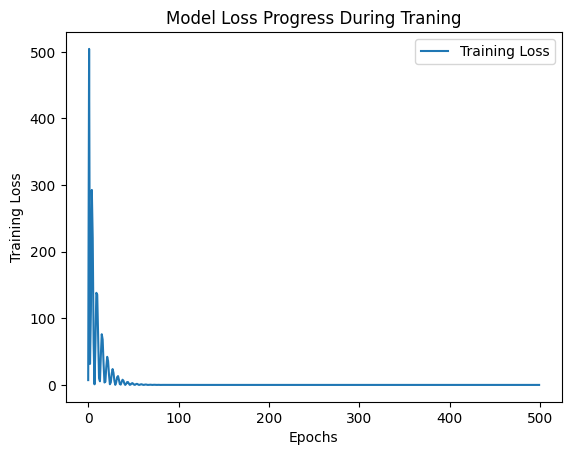

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Traning')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [ ]:
model.get_weights()

[array([[1.8000001]], dtype=float32), array([32.], dtype=float32)]

In [ ]:
Temp_C = 50
Temp_F = model.predict([Temp_C])
print('Temperature in DegF Using Trained ANN = ', Temp_F)

1/1 [==============================] - 0s 104ms/step
Temperature in DegF Using Trained ANN =  [[122.]]


In [ ]:
# Lets confirm the equation
Temp_F = 9/5 * Temp_C + 32
print('Temperature in DegF Using Equation = ', Temp_F)

Temperature in DegF Using Equation =  122.0
